
# DC Measurements logbook

v0.2.5

### Student: Evgeny Kolonsky
### Station: 2
### Date: 09/02/2026

***

In [43]:
!pip install uncertainties

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.5 MB/s eta 0:00:00


In [44]:
# ייבוא חבילות לעיבוד הנתונים ולקיחת מדידות
import numpy as np # math functions
import matplotlib.pyplot as plt # for plotting figures and setting their properties
from scipy.stats import linregress # linear regression
from uncertainties import ufloat

## DMM Keysight error table

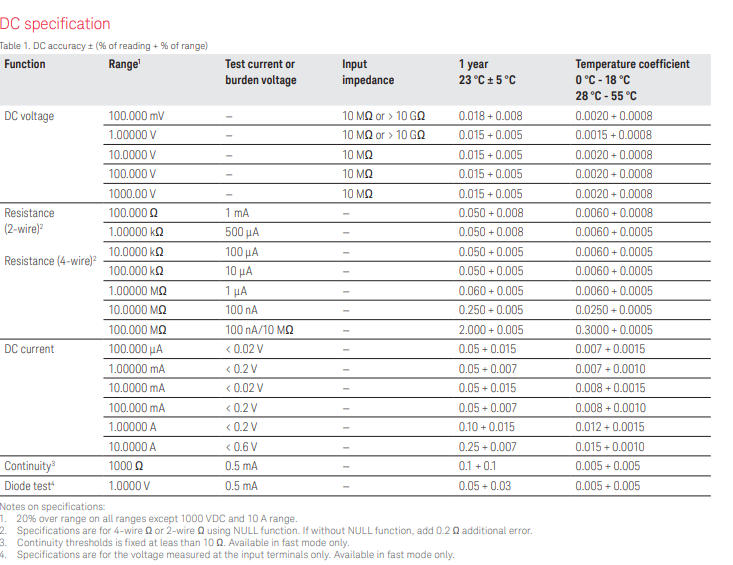

In [41]:
# resistance
DCR = {
    (0, 100)   :[0.050, 0.008], # up 100 Ohm range % of reading, % of range
    (100, 1e3)   :[0.050, 0.008], # up 1kOhm range % of reading, % of range
    (1e3, 10e3)   :[0.050, 0.005], # up 10kOhm range % of reading, % of range
    (10e3, 100e3)   :[0.050, 0.005], # up 100kOhm range % of reading, % of range
    (100e3, 1e6)   :[0.060, 0.005], # up 1MOhm range % of reading, % of range
    (1e6, 10e6)   :[0.250, 0.005], # up 10MOhm range % of reading, % of range
    (10e6, 100e6)   :[2.000, 0.005] # up 100MOhm range % of reading, % of range
    }
# DC current
DCI = {
    (0, 100e-6)   :[0.05, 0.015], # up 100 uA range % of reading, % of range
    (100e-6, 1e-3) :[0.05, 0.007], # 1mA range
    (1e-3,10e-3)   :[0.05, 0.015], # 10mA range
    (10e-3,100e-3)   :[0.05, 0.007], # 100mA range
    (10e-3, 1):[0.05, 0.015], # 1A range
    (1, 10):[0.25, 0.007] # 10A range
    }
# DC voltage
DCV = {
    (0, 0.1)   :[0.018, 0.008], # up 100 mV range % of reading, % of range
    (0.1, 1.0) :[0.015, 0.005], # 1V range
    (1.0,10)   :[0.015, 0.005], # 10V range
    (10,100)   :[0.015, 0.005], # 100V range
    (100, 1000):[0.015, 0.005] # 1000V range
    }

def get_err(reading, lookup_dict):
  err = 0
  for key in lookup_dict.keys():
    if key[0] <= reading <= key[1]:
      range = key[1]
      reading_error = lookup_dict[key][0]
      range_error   = lookup_dict[key][1]
      err = (reading * reading_error +  range * range_error) / 100
      break
  return err

def sum_err(err1, err2):
  return (err1**2 + err2**2)**0.5


<div dir=rtl>

## DC2 :  מחלק מתח

| scheme | formula|
|:-:  | :-:  |
| <img src="https://raw.githubusercontent.com/tphlabs/data/main/Lab2_python_workshop/DC2-5.png" width="150" > | $$V_{out} = V_{in} \frac{R_2}{R_1 + R_2}$$|


<div dir=rtl>
מדידת ערכי הנגדים שנבחרו להרכבת מחלק המתח (לא לשכוח הערכת שגיאה!):

<div class="alert alert-block alert-info", dir=rtl>
<b>טיפ:</b> המנעו מלבחור נגדים של עשרות אוהם בודדים
</div>

In [80]:
R1 = 219.85 # OHM
R1_err = get_err(R1, DCR) #
uR1 = ufloat(R1, R1_err)
print(f'R1= {uR1} Ohm')
R2 = 104.67#
R2_err = get_err(R2, DCR) #
uR2 = ufloat(R2, R2_err)
print(f'R2= {uR2} Ohm')

expected_ratio = uR2 / (uR1 + uR2)
print(f'expected ratio R2/(R1+R2)= {expected_ratio}')


R1= 219.85+/-0.19 Ohm
R2= 104.67+/-0.13 Ohm
expected ratio R2/(R1+R2)= 0.32254+/-0.00033


<div dir=rtl>

האם הערכים המדודים הממוצעים (באמצעות meas) של $V_{in}$, $V_{out}$ מתאימים ליחס החלוקה המתוכנן?

10 (לפחות) מדידות של מתח הכניסה ($V_{in}$) בערוץ X ומתח המוצא ($V_{out}$) בערוץ Y:

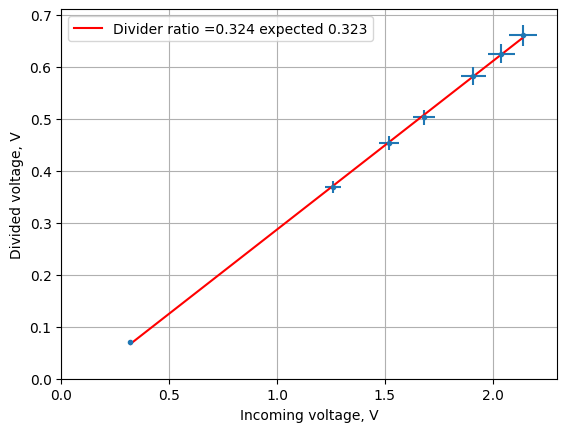

In [40]:
# Your data here
data = '''
# Vin/V, Vout/V
2.14 0.661
2.04 0.626
1.91 0.583
1.68 0.503
1.52 0.453
1.26 0.369
0.320 0.070
'''
V_in, V_out = np.genfromtxt(data.splitlines()).T
# Your data here
plt.errorbar(V_in, V_out, xerr=V_in*0.03, yerr=V_out*0.03, marker='.', linestyle='')
fit = linregress(V_in, V_out)
plt.plot(V_in, fit.intercept + fit.slope * V_in, color='red',
         label=f'Divider ratio ={fit.slope:.3f} expected {expected_ratio:.3f}')
plt.legend()
plt.xlabel('Incoming voltage, V')
plt.ylabel('Divided voltage, V')
plt.gca().set_ylim(bottom=0)
plt.gca().set_xlim(left=0)
plt.grid()
plt.show()

<div dir=rtl>
<b> הצגת הנתונים: </b> <br>

***

In [ ]:
# ייבוא חבילות לעיבוד הנתונים ולקיחת מדידות
import numpy as np # math functions
import matplotlib.pyplot as plt # for plotting figures and setting their properties
from scipy.stats import linregress # linear regression


<div dir=rtl>

## DC3 : התנגדות פנימית


In [ ]:
0.34 / 0.66 * 104

53.57575757575758

| scheme | formula|
|:-:  | :-:  |
| <img src="https://raw.githubusercontent.com/tphlabs/data/main/Lab2_python_workshop/DC3.png" width="150" > | $$V_x = V_g - I R_i $$|

<div dir=rtl>

<b> מדידות: </b> <br>

10 (לפחות) מדידות של המתח על הנגד ($V_{x}$) בערוץ X והזרם במעגל ($I$) במולטימטר:

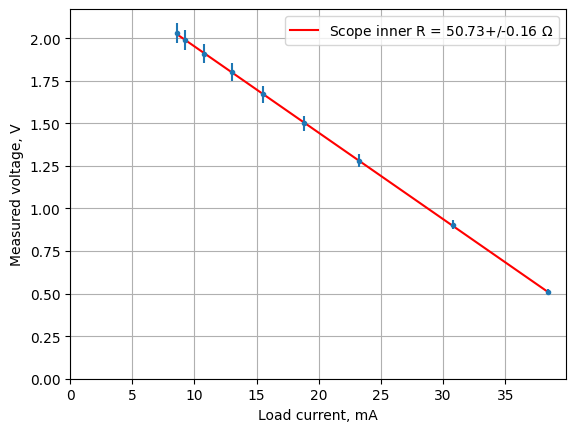

In [55]:
data = '''
#I/mA V / mV
38.4 510
30.8 904
23.2 1280
18.8 1500
15.5 1670
13.0 1800
10.8 1910
9.25 1990
8.6 2030
'''
I, V = np.genfromtxt(data.splitlines()).T
I *= 1e-3
V *= 1e-3
I_err = np.array([get_err(_, DCI) for _ in I]) # #
Vx_err = V * 0.03 #  scope error 3%

fit = linregress(I, V)
Rin = - fit.slope
Rin_err = fit.stderr
uRin = ufloat(Rin, Rin_err)
plt.errorbar(I*1000, V, xerr=I_err, yerr=Vx_err, marker='.', linestyle='')
plt.plot(I*1000, fit.intercept + fit.slope * I, color='red',
         label=fr'Scope inner R = {uRin} $\Omega$')
plt.legend()
plt.xlabel('Load current, mA')
plt.ylabel('Measured voltage, V')
plt.gca().set_ylim(bottom=0)
plt.gca().set_xlim(left=0)
plt.grid()
plt.show()

<div dir=rtl>

<b> הצגת הנתונים: </b> <br>

In [ ]:
# Your code here

<div dir=rtl>
חילוץ ההתנגדות הפנימית (באמצעות רגרסיה): <br>

<font color="red">
(לא לשכוח להזין בלומדה!)
</font>

In [ ]:
# Your code here

***



In [ ]:
# ייבוא חבילות לעיבוד הנתונים ולקיחת מדידות
import numpy as np # math functions
import matplotlib.pyplot as plt # for plotting figures and setting their properties
from scipy.stats import linregress # linear regression

<div dir=rtl>

## DC4 : מחלק זרם
    


| scheme | formula|
|:-:  | :-:  |
| <img src="https://raw.githubusercontent.com/tphlabs/data/main/Lab2_python_workshop/DC4.png" width="150" > | $$I_{out} = I_{in} \frac{R_1}{R_1 + R_2}$$|


<div dir=rtl>
מדידת ערכי הנגדים שנבחרו להרכבת מחלק הזרם (לא לשכוח הערכת שגיאה!):

<div class="alert alert-block alert-info", dir=rtl>
<b>טיפ:</b> המנעו מלבחור נגדים בעלי התנגדות גבוהה
</div>

In [57]:
R1 = 10.197#
R1_err = get_err(R1, DCR)#
uR1 = ufloat(R1, R1_err)
print(f'R1= {uR1}')
R2 = 47.24 #
R2_err = get_err(R2, DCR)#
uR2 = ufloat(R2, R2_err)
print(f'R2= {uR2}')


R1= 10.197+/-0.013
R2= 47.240+/-0.032


In [63]:
#I1 = 31.3 #mA
Iin = 39.6 #mA
Iin_err = get_err(Iin, DCI)
uIin = ufloat(Iin, Iin_err)
Iout = 8.3 #mA
Iout_err = get_err(Iout, DCI)
uIout = ufloat(Iout, Iout_err)


measured ratio 0.2096+/-0.0005


<div dir=rtl> <b> מדידות: </b> <br>

<div dir=rtl>
10 (לפחות) מדידות של זרם הכניסה ($I$) במולטימטר והמתח על נגד הבוחן ($V_{x}$) בערוץ X:

In [85]:
# Current divider 1:3
R1 = 47.23
R1_err = get_err(R1, DCR)#
uR1 = ufloat(R1, R1_err)
R2 = 99.2
R2_err = get_err(R2, DCR)#
uR2 = ufloat(R2, R2_err)
Rm = 219.8
Rm_err = get_err(Rm, DCR)
uRm = ufloat(Rm, Rm_err)
Vm = 0.906 #V
Vm_err = get_err(Vm, DCV)
uVm = ufloat(Vm, Vm_err)
uIin = uVm / uRm
print(Iin)
Iout = 0.5e-3
Iout_err = get_err(Iout, DCI)
uIout = ufloat(Iout, Iout_err)
ratio = uIout / uIin
print(f'measured ratio {ratio}')
expected = uR1 / (uR1 + uR2)
print(f'expected ratio R1/(R1+R2)= {expected}')
print(f'R1= {uR1}')
print(f'R2= {uR2}')


R1 / (R1+R2)

[0.00814377 0.00800728 0.00764331 0.00718835 0.00641492 0.00614195
 0.00582348 0.00545951 0.00514104 0.00477707]
measured ratio 0.12130+/-0.00013
expected ratio R1/(R1+R2)= 0.32254+/-0.00019
R1= 47.230+/-0.032
R2= 99.20+/-0.06


0.3225431947005395

measured ratio 0.3166+/-0.0018


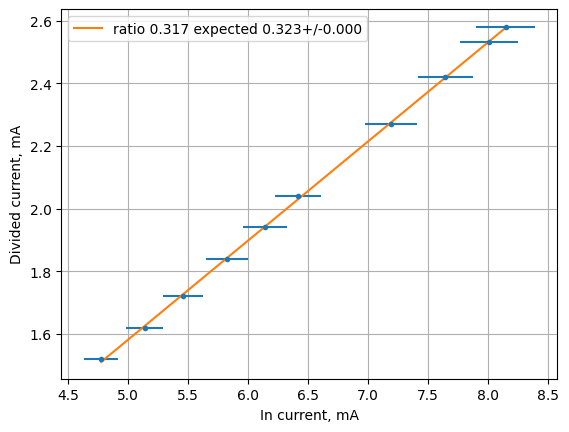

In [86]:
data = '''
#Iout mA, V mV
2.58 1790
2.53 1760
2.42 1680
2.27 1580
2.04 1410
1.94 1350
1.84 1280
1.72 1200
1.62 1130
1.52 1050
'''
Iout, V = np.genfromtxt(data.splitlines()).T
Iout *= 1e-3
V *= 1e-3
Iout_err = np.array([get_err(_, DCI) for _ in Iout]) # #
V_err = V * 0.03 #  scope error 3%
Iin = V / Rm
Iin_err = Iin * 0.03
fit = linregress(Iin, Iout)
ratio = ufloat(fit.slope, fit.stderr)
print(f'measured ratio {ratio}')
plt.errorbar(Iin*1000, Iout*1000, xerr=Iin_err*1000, yerr=Iout_err*1000, marker='.', linestyle='')
plt.plot(Iin*1000, 1000*(fit.intercept + fit.slope* Iin),
         label=f'ratio {fit.slope:.3f} expected {expected:.3f}')
plt.legend()
plt.xlabel('In current, mA')
plt.ylabel('Divided current, mA')

plt.grid()

I = np.array([]) #
I_err = np.array([]) #
Vx = np.array([]) #
Vx_err = np.array([]) #

<div dir=rtl> <b> הצגת הנתונים: </b> <br>

In [ ]:
# Your code here

<div dir=rtl>
חילוץ יחס החלוקה (באמצעות רגרסיה): <br>

<font color="red">
(לא לשכוח להזין בלומדה!)
</font>

In [ ]:
# Your code here

<div dir=rtl>
השוואת יחס החלוקה ממדידת הנגדים מול זה שהתקבל מהרגרסיה:


***

In [ ]:
# ייבוא חבילות לעיבוד הנתונים ולקיחת מדידות
import numpy as np # math functions
import matplotlib.pyplot as plt # for plotting figures and setting their properties
from scipy.stats import linregress # linear regression

<div dir=rtl>

## DC5 : ספק כוח

| scheme | formula|
|:-:  | :-:  |
| <img src="https://raw.githubusercontent.com/tphlabs/data/main/Lab2_python_workshop/DC5.png" width="150" > | $$R_L = V_{set} / I_{set}$$|

<div dir=rtl>
הגבלות המתח והזרם שהצבנו בספק:

In [ ]:
V_set = 1#
I_set = 0.2#

<div dir=rtl> <b> מדידות: </b> <br>

<div dir=rtl>
20 (לפחות) מדידות של המתח והזרם (ממכשירי המדידה):

Text(0, 0.5, 'Voltage, mV')

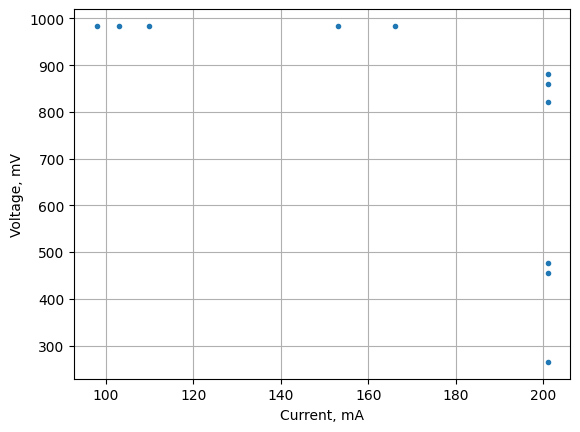

In [87]:
data = '''
# I mA, V mV
98 984
110 984
103 984
153 984
166 984
201 821
201 859
201 881
201 456
201 477
201 265
'''
I, V = np.genfromtxt(data.splitlines()).T

plt.plot(I, V, '.')
plt.grid()
plt.xlabel('Current, mA')
plt.ylabel('Voltage, mV'  )

<div dir=rtl> <b> הצגת הנתונים: </b> <br>

In [ ]:
# Your code here
V = 4.60
I = 0.044
R = V / I
R

104.54545454545455

<div dir=rtl>
מה מתאר הגרף?

***